## 시각화 라이브러리

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

- 한글 폰트

In [85]:
import platform
print(platform.system())
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

Windows


## 지하철 혼잡도 데이터(2022) 불러오기 
- 서울교통공사 역별 혼잡도 현황 https://data.seoul.go.kr/dataList/OA-12928/F/1/datasetView.do
- 1~8호선만 제공(문의해보니 9호선은 민간이어서 제공안한다함(?))
- 혼잡도: 열차 1량당 정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 
혼잡도 34%로 산정
- 단위 : %, 단위기준 : 열차 1량의 승차인원 = 160명 = 100
- 일부역 결측치 존재(5시30분, 23시00분, 23시30분 컬럼- 실제운행하지 않는 시간)
  - 분석할 때에는 결측치가 없는 시간대끼리 비교를 할 것인가? 아니면 0으로 둘 것인가?
  - 아직 처리 안함..%

In [57]:
import pandas as pd
data = pd.read_csv("[지하철_102_raw]_서울교통공사_역별시간대별혼잡도_20221231.csv")
data.head(2)

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
0,1,평일,1,150,서울역,상선,7.3,18.1,18.1,30.9,...,15.6,17.1,17.7,14.9,13.7,17.2,10.4,8.8,8.8,1.2
1,2,평일,1,150,서울역,하선,11.5,11.0,13.2,21.4,...,35.3,36.1,35.0,29.4,39.2,26.1,17.1,11.8,8.5,0.0


### 각 행별 최댓값을 가진 컬럼 

In [58]:
# 시간 컬럼 선택
time_column = data.columns[6:]
time_column
# 각 행에서의 최댓값을 가진 컬럼 찾기
max_column = data[time_column].idxmax(axis=1)
# 컬럼 추가
data['최대혼잡시간대'] = max_column
data.head(2)
# 최대혼잡도 추가
data['최대혼잡도'] = data[time_column].max(axis=1)

In [118]:
data_1 = data.copy()
data_1.head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,1,평일,1,150,서울역,상선,7.3,18.1,18.1,30.9,...,17.7,14.9,13.7,17.2,10.4,8.8,8.8,1.2,8시30분,82.7
1,2,평일,1,150,서울역,하선,11.5,11.0,13.2,21.4,...,35.0,29.4,39.2,26.1,17.1,11.8,8.5,0.0,18시00분,107.8
2,3,평일,1,151,시청,상선,6.6,15.4,14.7,25.0,...,21.8,17.5,18.5,18.4,14.9,11.5,7.0,2.8,18시00분,58.1
3,4,평일,1,151,시청,하선,9.0,9.1,14.6,20.0,...,31.1,28.5,30.2,22.2,15.4,10.1,6.5,0.8,18시00분,105.5
4,5,평일,1,152,종각,상선,6.3,14.4,10.7,17.6,...,29.7,22.6,26.1,24.0,19.7,14.6,9.6,4.2,18시00분,76.1


In [120]:
data_1.sort_values(by=['최대혼잡도'], ascending=False)

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
209,210,평일,4,418,성신여대입구,하선,67.0,42.2,53.5,93.6,...,12.4,15.1,14.3,13.5,9.7,9.4,4.5,4.4,8시00분,185.5
211,212,평일,4,419,한성대입구,하선,53.3,43.5,53.5,88.6,...,14.5,16.6,15.9,14.7,10.5,10.2,4.9,4.4,8시00분,184.5
207,208,평일,4,417,길음,하선,54.6,38.8,52.7,90.2,...,10.1,12.2,11.2,11.1,7.8,7.8,4.4,1.9,8시00분,176.2
71,72,평일,2,226,사당,외선,81.0,54.4,59.5,96.9,...,31.5,27.8,24.6,22.1,21.2,13.0,9.6,6.2,8시30분,172.3
213,214,평일,4,420,혜화,하선,55.3,42.3,52.0,84.9,...,23.6,32.2,35.5,24.2,19.4,15.1,7.9,5.6,8시00분,171.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,1461,공휴일,6,2612,역촌,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,1463,공휴일,6,2613,불광,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1464,1465,공휴일,6,2614,독바위,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,1467,공휴일,6,2615,연신내,상선,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 6호선 상선 중 출발역이 역촌, 불광, 독바위, 연신내, 구산역인 경우는 전체 신간대에 대해 결측치 존재
  - 평일엔 0.0으로 기입, 토요일, 공휴일엔 NaN 기입
  - 단선 운행 때문
  - 삭제하면 됨
  - 아직 삭제 안 함..

In [129]:
data_1[(data_1['요일구분'] == '평일') & (data_1['호선'] == 6) & (data_1['상하구분'] == '상선')].head()

,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
354,355,평일,6,2611,응암,상선,11.8,9.2,10.4,15.0,...,19.8,20.7,19.8,16.4,10.0,12.2,5.4,6.6,18시30분,48.7
356,357,평일,6,2612,역촌,상선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5시30분,0.0
358,359,평일,6,2613,불광,상선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5시30분,0.0
360,361,평일,6,2614,독바위,상선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5시30분,0.0
362,363,평일,6,2615,연신내,상선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5시30분,0.0


## 4호선 데이터 분리
- 최대 혼잡도가 가장 큰 성신여대역(상선)을 향해서 분석

In [130]:
line_4 = data_1[data_1['호선'] == 4].reset_index()
line_4.head(2)

,index,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,190,191,평일,4,409,당고개,상선,0.1,5.2,0.9,...,2.2,3.4,4.0,2.6,3.9,4.4,2.6,1.4,18시00분,10.2
1,191,192,평일,4,409,당고개,하선,4.4,5.2,9.0,...,2.3,1.9,1.9,1.6,1.3,1.7,0.7,0.0,8시00분,21.2


### 상하 구분

In [131]:
line_4_up = line_4[line_4['상하구분'] == '상선'].reset_index()
line_2_dn = line_4[line_4['상하구분'] == '하선'].reset_index()
line_2_up.head(3)

,level_0,index,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,...,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대
0,0,20,21,평일,2,201,시청,내선,18.9,23.3,...,22.3,35.0,33.6,34.8,32.3,25.6,21.3,16.2,4.7,8시00분
1,2,22,23,평일,2,202,을지로입구,내선,12.8,19.7,...,26.8,42.1,40.0,39.9,35.4,27.6,27.5,16.0,6.4,18시00분
2,4,24,25,평일,2,203,을지로3가,내선,13.2,19.3,...,25.9,42.7,43.1,37.7,38.8,27.5,30.5,16.0,6.2,18시00분


In [132]:
# 필요없는 칼럼 제거
drop_columns = ['level_0', 'index', '연번']
line_4_up.drop(drop_columns, axis=1, inplace=True)
line_4_up.head(1)

,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,평일,4,409,당고개,상선,0.1,5.2,0.9,1.8,3.2,...,2.2,3.4,4.0,2.6,3.9,4.4,2.6,1.4,18시00분,10.2


### 상선
- 4호선 역마다 평일, 토요일, 공휴일 별 최대혼잡시간대

In [133]:
line_4_up.groupby(['요일구분'])['최대혼잡시간대'].value_counts()

요일구분  최대혼잡시간대
공휴일   16시30분      6
      21시00분      5
      20시30분      4
      18시00분      3
      18시30분      2
      17시00분      2
      11시00분      1
      12시30분      1
      19시30분      1
      17시30분      1
토요일   17시00분      6
      11시00분      5
      18시00분      4
      18시30분      4
      17시30분      3
      21시00분      2
      16시30분      2
      5시30분       1
      12시30분      1
      13시00분      1
평일    18시30분     11
      8시00분       8
      18시00분      6
      17시30분      1
Name: count, dtype: int64

In [134]:
mean_4week = line_4_up[line_4_up['요일구분']=='평일'][['18시30분', '8시00분', '18시00분', '17시30분']].agg(['mean', 'max'])
mean_4sat = line_4_up[line_4_up['요일구분']=='토요일'][['17시00분', '11시00분', '18시00분', '18시30분', '17시30분', '21시00분', '16시30분', '5시30분', '12시30분', '13시00분']].agg(['mean', 'max'])
mean_4sun = line_4_up[line_4_up['요일구분']=='공휴일'][['16시30분', '21시00분', '20시30분', '18시00분', '18시30분', '17시00분', '11시00분', '12시30분', '19시30분', '17시30분']].agg(['mean', 'max'])

In [135]:
mean_4week

,18시30분,8시00분,18시00분,17시30분
mean,69.411538,36.107692,66.384615,59.923077
max,141.100000,124.100000,119.300000,117.000000


In [136]:
mean_4sat

,17시00분,11시00분,18시00분,18시30분,17시30분,21시00분,16시30분,5시30분,12시30분,13시00분
mean,42.1,29.303448,42.231034,38.858621,40.441379,33.444828,39.051724,9.876,30.986207,30.237931
max,84.1,77.400000,91.600000,78.600000,76.500000,74.900000,78.900000,18.800,70.900000,67.800000


In [137]:
mean_4sun

,16시30분,21시00분,20시30분,18시00분,18시30분,17시00분,11시00분,12시30분,19시30분,17시30분
mean,29.873077,27.830769,29.046154,33.830769,33.292308,29.226923,21.619231,24.353846,28.480769,30.580769
max,54.400000,57.600000,54.700000,95.000000,84.600000,60.400000,44.300000,49.000000,50.500000,51.100000


- 상선의 혼잡도 평균

In [151]:
line_4_up[line_4_up['요일구분']=='공휴일']

,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
55,공휴일,4,409,당고개,상선,0.2,1.9,1.0,0.5,1.1,...,0.3,5.8,2.8,2.3,3.5,1.6,NaN,NaN,20시30분,6.7
56,공휴일,4,410,상계,상선,NaN,3.5,1.8,1.3,1.6,...,6.5,3.7,4.6,5.4,3.7,2.7,NaN,NaN,17시00분,8.4
57,공휴일,4,411,노원,상선,NaN,5.0,2.8,2.2,2.5,...,10.0,7.8,8.6,8.3,6.4,5.5,NaN,NaN,17시00분,13.1
58,공휴일,4,412,창동,상선,NaN,10.9,5.1,4.2,4.3,...,14.8,12.0,13.2,11.4,9.0,9.6,NaN,NaN,18시00분,18.5
59,공휴일,4,413,쌍문,상선,NaN,12.6,7.2,5.2,6.8,...,24.9,19.2,22.7,17.3,14.6,12.2,NaN,NaN,19시30분,26.1
60,공휴일,4,414,수유,상선,13.5,11.8,7.6,5.6,6.9,...,31.7,24.5,28.3,21.8,19.0,15.3,NaN,NaN,21시00분,31.7
61,공휴일,4,415,미아,상선,11.4,11.9,7.8,6.5,7.0,...,38.7,30.8,34.0,27.0,23.7,19.7,NaN,NaN,21시00분,38.7
62,공휴일,4,416,미아삼거리,상선,10.3,11.7,8.2,6.8,6.9,...,36.7,36.0,31.6,27.9,26.0,20.9,NaN,NaN,20시30분,46.8
63,공휴일,4,417,길음,상선,9.6,12.1,8.5,7.0,6.8,...,41.1,40.0,34.7,30.6,28.9,22.6,NaN,NaN,20시30분,49.4
64,공휴일,4,418,성신여대입구,상선,7.5,13.3,6.6,6.6,7.6,...,50.7,44.6,36.4,30.0,34.6,25.5,NaN,NaN,21시00분,50.7


In [144]:
count = len(line_4_up[line_4_up['요일구분'] == '평일'])
print("요일구분이 '평일'인 행의 개수:", count)
count = len(line_4_up[line_4_up['요일구분'] == '토요일'])
print("요일구분이 '평일'인 행의 개수:", count)
count = len(line_4_up[line_4_up['요일구분'] == '공휴일'])
print("요일구분이 '평일'인 행의 개수:", count)

요일구분이 '평일'인 행의 개수: 26
요일구분이 '평일'인 행의 개수: 29
요일구분이 '평일'인 행의 개수: 26


In [147]:
# 평일
mean_1 = line_4_up.iloc[:26, 5:-2].mean()
mean_1

5시30분     14.692308
6시00분     17.484615
6시30분     15.142308
7시00분     20.876923
7시30분     27.538462
8시00분     36.107692
8시30분     31.453846
9시00분     28.080769
9시30분     30.423077
10시00분    24.700000
10시30분    22.192308
11시00분    22.284615
11시30분    24.330769
12시00분    26.573077
12시30분    27.484615
13시00분    28.042308
13시30분    27.596154
14시00분    28.376923
14시30분    29.357692
15시00분    32.919231
15시30분    32.850000
16시00분    33.911538
16시30분    45.823077
17시00분    57.253846
17시30분    59.923077
18시00분    66.384615
18시30분    69.411538
19시00분    50.261538
19시30분    33.665385
20시00분    29.080769
20시30분    27.538462
21시00분    26.957692
21시30분    25.803846
22시00분    31.680769
22시30분    33.807692
23시00분    24.838462
23시30분    17.515385
00시00분    11.623077
00시30분     8.788462
dtype: float64

In [152]:
# 토요일
mean_2 = line_4_up.iloc[26:55, 5:-2].mean()
mean_2

5시30분      9.876000
6시00분     13.417241
6시30분      9.803448
7시00분      8.948276
7시30분     11.848276
8시00분     17.693103
8시30분     20.024138
9시00분     23.731034
9시30분     22.596552
10시00분    25.224138
10시30분    26.975862
11시00분    29.303448
11시30분    28.882759
12시00분    27.213793
12시30분    30.986207
13시00분    30.237931
13시30분    29.665517
14시00분    29.155172
14시30분    30.706897
15시00분    31.282759
15시30분    35.400000
16시00분    35.106897
16시30분    39.051724
17시00분    42.100000
17시30분    40.441379
18시00분    42.231034
18시30분    38.858621
19시00분    35.003448
19시30분    33.800000
20시00분    31.313793
20시30분    31.134483
21시00분    33.444828
21시30분    31.062069
22시00분    30.606897
22시30분    29.531034
23시00분    29.937931
23시30분    25.731034
00시00분          NaN
00시30분          NaN
dtype: float64

In [153]:
# 공휴일
mean_3 = line_4_up.iloc[55:, 5:-2].mean()
mean_3

5시30분      6.950000
6시00분      9.584615
6시30분      6.461538
7시00분      6.815385
7시30분      8.592308
8시00분     13.376923
8시30분     15.888462
9시00분     17.757692
9시30분     18.823077
10시00분    20.519231
10시30분    23.392308
11시00분    21.619231
11시30분    22.357692
12시00분    22.696154
12시30분    24.353846
13시00분    24.730769
13시30분    23.173077
14시00분    23.600000
14시30분    24.061538
15시00분    23.857692
15시30분    27.319231
16시00분    25.976923
16시30분    29.873077
17시00분    29.226923
17시30분    30.580769
18시00분    33.830769
18시30분    33.292308
19시00분    29.988462
19시30분    28.480769
20시00분    27.776923
20시30분    29.046154
21시00분    27.830769
21시30분    25.757692
22시00분    22.723077
22시30분    19.884615
23시00분    19.223077
23시30분    14.515385
00시00분          NaN
00시30분          NaN
dtype: float64

- 성신여대입구역(상선)에 대해 평일, 토요일, 공휴일 혼잡도 비교

In [156]:
line_4_ss = line_4_up[line_4_up['출발역'] == '성신여대입구'].reset_index()
line_4_ss

,index,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,9,평일,4,418,성신여대입구,상선,21.8,15.3,13.8,10.8,...,48.1,44.7,57.4,60.8,45.8,30.0,21.2,17.5,18시30분,119.5
1,38,토요일,4,418,성신여대입구,상선,11.9,17.2,10.4,8.9,...,66.2,57.8,57.7,54.2,62.2,43.1,NaN,NaN,21시00분,66.2
2,64,공휴일,4,418,성신여대입구,상선,7.5,13.3,6.6,6.6,...,50.7,44.6,36.4,30.0,34.6,25.5,NaN,NaN,21시00분,50.7


In [157]:
# 그래프그리기 위한 데이터프레임 정리
drop_ss = ['index', '호선', '역번호', '출발역', '상하구분', '5시30분', '00시00분', '00시30분', '최대혼잡시간대', '최대혼잡도']
df_ss = line_4_ss.drop(columns=drop_ss, inplace=False)
df_ss

,요일구분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,평일,15.3,13.8,10.8,16.0,16.4,14.1,15.5,15.4,18.8,...,89.7,60.4,48.2,48.9,48.1,44.7,57.4,60.8,45.8,30.0
1,토요일,17.2,10.4,8.9,11.0,15.3,20.0,22.1,16.2,26.0,...,53.3,56.9,57.0,49.7,66.2,57.8,57.7,54.2,62.2,43.1
2,공휴일,13.3,6.6,6.6,7.6,12.0,15.9,15.7,14.9,16.6,...,45.6,43.8,41.7,41.3,50.7,44.6,36.4,30.0,34.6,25.5


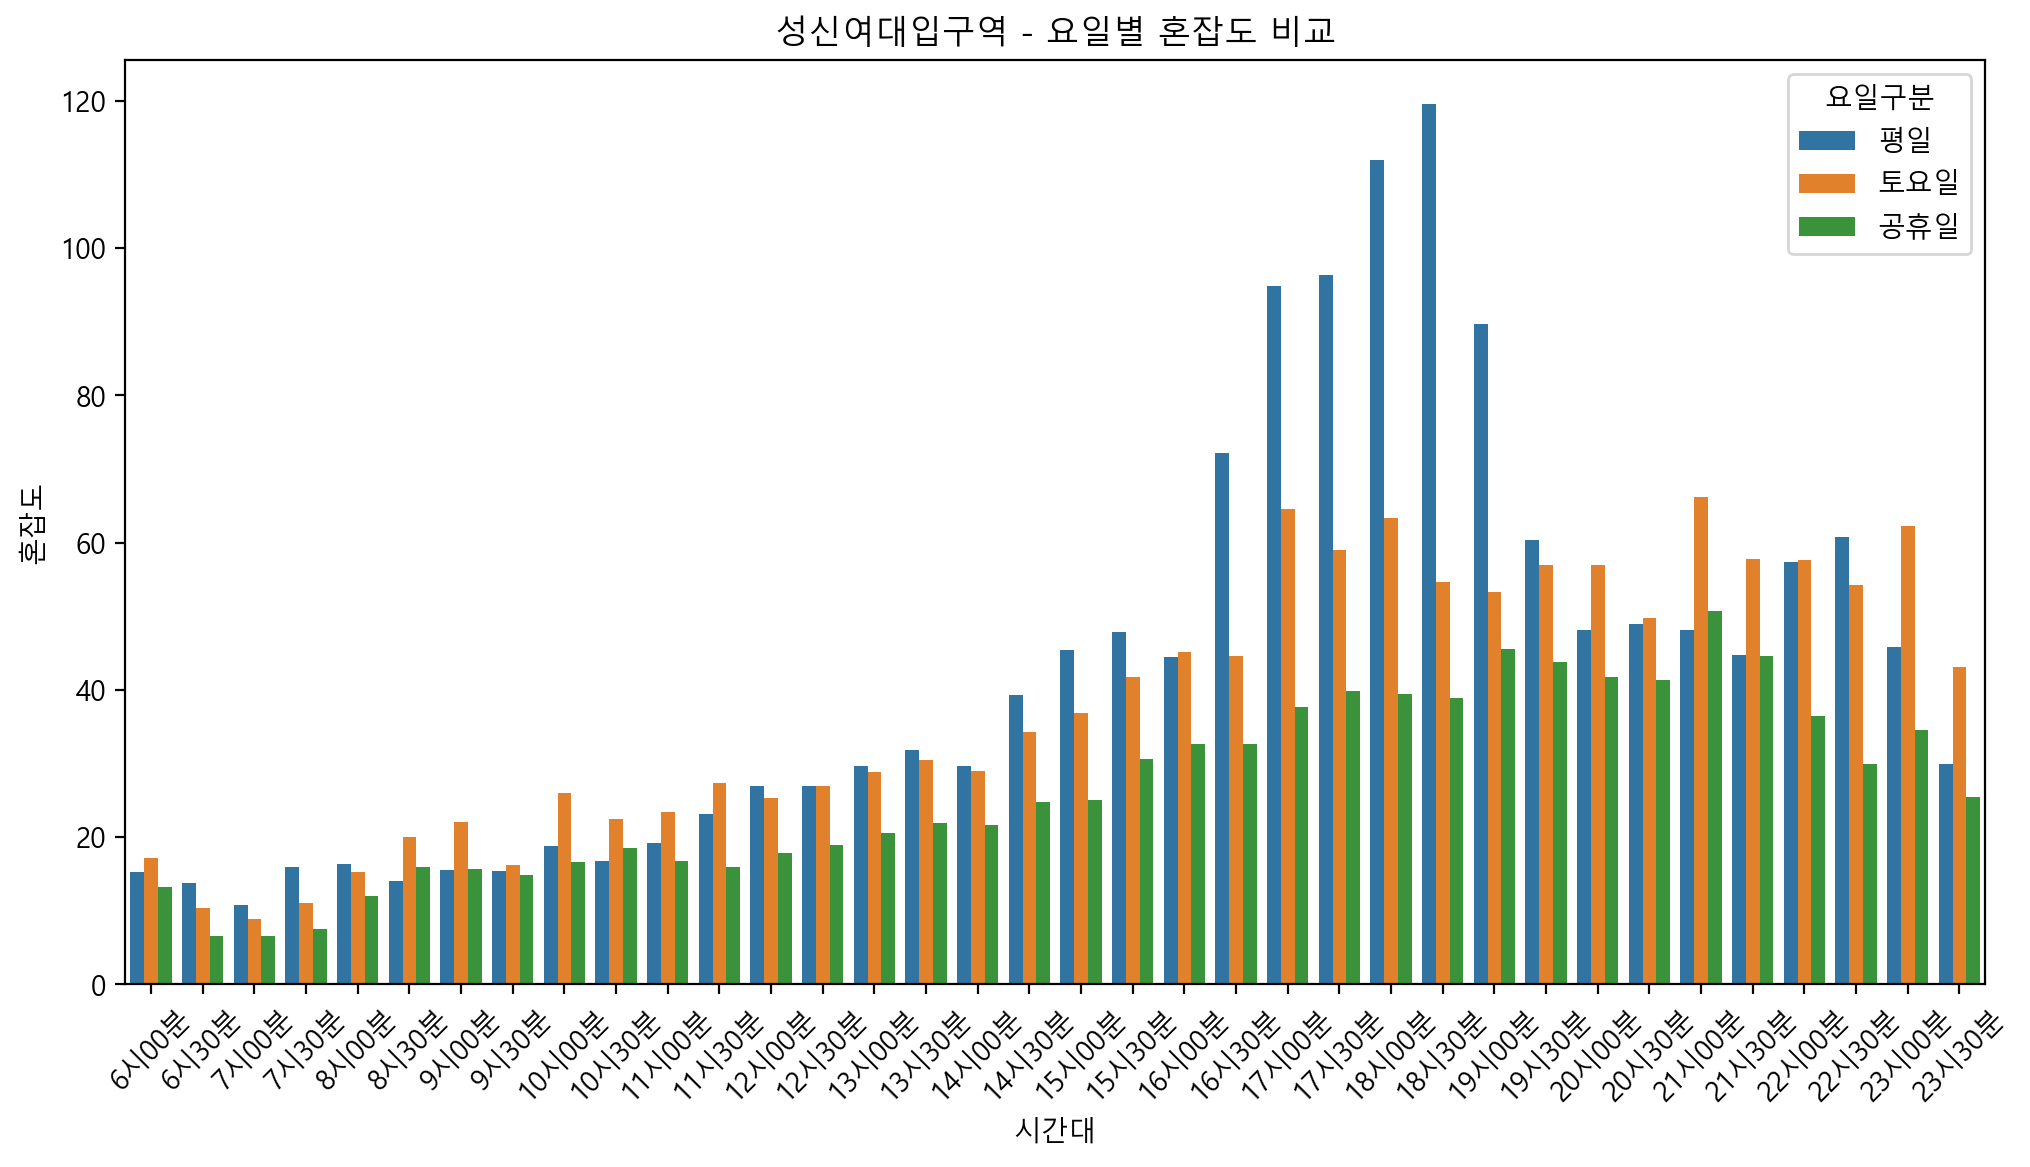

In [158]:
import matplotlib.pyplot as plt

# 데이터프레임을 'melt' 함수를 사용하여 'variable' 열로 변환
melted_df = df_ss.melt(id_vars="요일구분", var_name="시간대", value_name="혼잡도")

# seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 조절
sns.barplot(data=melted_df, x="시간대", y="혼잡도", hue="요일구분")
plt.title('성신여대입구역 - 요일별 혼잡도 비교')
plt.ylabel('혼잡도')
plt.xlabel('시간대')
plt.xticks(rotation=45)  # X 축 레이블 회전전

plt.show()


## 2호선 데이터 분리
- [시각화_001]에서 승차총승객수가 TOP1이었던 잠실역을 향해서 분석

In [63]:
line_2 = data_1[data_1['호선'] == 2].reset_index()
line_2.head(2)

,index,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,20,21,평일,2,201,시청,내선,18.9,23.3,26.7,...,35.0,33.6,34.8,32.3,25.6,21.3,16.2,4.7,8시00분,94.7
1,21,22,평일,2,201,시청,외선,10.2,19.7,12.3,...,46.7,48.6,58.6,44.0,28.1,19.0,14.2,9.9,18시00분,110.9


### 내외구분

In [64]:
line_2_in = line_2[line_2['상하구분'] == '내선'].reset_index()
line_2_ex = line_2[line_2['상하구분'] == '외선'].reset_index()
line_2_ex.head(3)

,level_0,index,연번,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,1,21,22,평일,2,201,시청,외선,10.2,19.7,...,46.7,48.6,58.6,44.0,28.1,19.0,14.2,9.9,18시00분,110.9
1,3,23,24,평일,2,202,을지로입구,외선,9.7,22.9,...,41.9,44.5,53.6,41.2,26.1,17.5,12.2,9.3,18시00분,100.8
2,5,25,26,평일,2,203,을지로3가,외선,14.6,26.3,...,32.6,38.4,42.6,35.2,20.3,15.7,10.5,6.3,18시00분,81.1


In [65]:
drop_columns = ['level_0', 'index', '연번']
line_2_in.drop(drop_columns, axis=1, inplace=True)
line_2_in.head(1)

,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,평일,2,201,시청,내선,18.9,23.3,26.7,39.2,62.7,...,35.0,33.6,34.8,32.3,25.6,21.3,16.2,4.7,8시00분,94.7


### 내선
- 2호선 역마다 평일, 토요일, 공휴일 별 최대혼잡시간대

In [66]:
line_2_in.groupby(['요일구분'])['최대혼잡시간대'].value_counts()

요일구분  최대혼잡시간대
공휴일   15시30분     14
      21시00분      7
      12시30분      7
      13시00분      4
      17시30분      3
      13시30분      3
      16시00분      3
      16시30분      3
      20시30분      2
      5시30분       1
      22시00분      1
      18시00분      1
      18시30분      1
      12시00분      1
토요일   16시30분     17
      16시00분     12
      12시30분      7
      18시00분      3
      15시30분      3
      23시30분      2
      17시00분      2
      22시00분      2
      23시00분      2
      5시30분       1
평일    8시00분      17
      18시00분     11
      18시30분      9
      8시30분       8
      17시30분      4
      5시30분       1
      17시00분      1
Name: count, dtype: int64

- 평일, 토요일, 공휴일 최대혼잡도시간대의 혼잡도 평균

In [70]:
mean_week = line_2_in[line_2_in['요일구분']=='평일'][['8시00분', '18시00분', '18시30분', '8시30분', '17시30분', '5시30분', '17시00분']].agg(['mean', 'max'])
mean_sat = line_2_in[line_2_in['요일구분']=='토요일'][['16시30분', '16시00분', '12시30분', '18시00분', '15시30분', '23시30분', '17시00분', '22시00분', '23시00분', '5시30분']].agg(['mean', 'max'])
mean_sun = line_2_in[line_2_in['요일구분']=='공휴일'][['15시30분', '21시00분', '12시30분', '13시00분', '17시30분', '13시30분', '16시00분', '16시30분', '20시30분', '5시30분', '22시00분', '18시00분', '18시30분', '12시00분']].agg(['mean', 'max'])
mean_week

,8시00분,18시00분,18시30분,8시30분,17시30분,5시30분,17시00분
mean,70.588235,70.111765,69.792157,61.656863,62.57451,20.356863,59.033333
max,130.900000,138.200000,155.500000,101.100000,138.40000,82.500000,132.600000


In [71]:
mean_sat

,16시30분,16시00분,12시30분,18시00분,15시30분,23시30분,17시00분,22시00분,23시00분,5시30분
mean,56.158824,52.827451,43.537255,44.509804,47.952941,27.523529,50.221569,42.411765,37.172549,17.113725
max,78.700000,86.800000,78.200000,70.100000,66.200000,66.100000,70.800000,84.100000,68.800000,65.200000


In [72]:
mean_sun

,15시30분,21시00분,12시30분,13시00분,17시30분,13시30분,16시00분,16시30분,20시30분,5시30분,22시00분,18시00분,18시30분,12시00분
mean,33.72549,29.058824,32.621569,30.437255,33.237255,31.086275,33.562745,35.001961,26.833333,10.554902,27.880392,30.880392,30.503922,27.609804
max,51.40000,64.900000,58.700000,50.200000,46.300000,49.400000,50.800000,49.000000,55.200000,31.700000,51.600000,51.500000,57.400000,49.200000


- 내선의 시간대별 혼잡도 평균

In [73]:
line_2_in.head(3)

,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,평일,2,201,시청,내선,18.9,23.3,26.7,39.2,62.7,...,35.0,33.6,34.8,32.3,25.6,21.3,16.2,4.7,8시00분,94.7
1,평일,2,202,을지로입구,내선,12.8,19.7,20.5,27.8,45.8,...,42.1,40.0,39.9,35.4,27.6,27.5,16.0,6.4,18시00분,85.0
2,평일,2,203,을지로3가,내선,13.2,19.3,19.9,26.2,42.6,...,42.7,43.1,37.7,38.8,27.5,30.5,16.0,6.2,18시00분,88.7


In [76]:
# 평일
mean_1 = line_2_in.iloc[:10, 5:-2].mean()
mean_1

5시30분     15.90
6시00분     21.74
6시30분     22.17
7시00분     30.27
7시30분     46.31
8시00분     70.91
8시30분     63.34
9시00분     42.39
9시30분     36.61
10시00분    25.37
10시30분    30.37
11시00분    31.60
11시30분    33.19
12시00분    35.24
12시30분    37.35
13시00분    40.16
13시30분    37.48
14시00분    36.98
14시30분    40.10
15시00분    40.99
15시30분    42.16
16시00분    40.93
16시30분    54.54
17시00분    62.19
17시30분    62.06
18시00분    77.05
18시30분    65.64
19시00분    41.23
19시30분    28.21
20시00분    24.97
20시30분    22.44
21시00분    33.65
21시30분    37.18
22시00분    32.51
22시30분    34.13
23시00분    23.00
23시30분    24.27
00시00분    12.39
00시30분     8.69
dtype: float64

In [79]:
# 토요일
## 00시00분, 00시00분 NA값은 제거
mean_2 = line_2_in.iloc[10:20, 5:-4].mean()
mean_2

5시30분     17.70
6시00분     16.61
6시30분     18.55
7시00분     28.46
7시30분     42.01
8시00분     69.65
8시30분     71.42
9시00분     48.70
9시30분     46.73
10시00분    31.22
10시30분    26.37
11시00분    29.30
11시30분    28.05
12시00분    29.08
12시30분    32.28
13시00분    32.11
13시30분    32.10
14시00분    31.13
14시30분    33.14
15시00분    34.74
15시30분    37.54
16시00분    39.31
16시30분    41.95
17시00분    50.77
17시30분    42.96
18시00분    53.39
18시30분    57.15
19시00분    33.68
19시30분    24.81
20시00분    25.49
20시30분    24.77
21시00분    32.01
21시30분    32.57
22시00분    29.29
22시30분    22.48
23시00분    15.30
23시30분    10.76
dtype: float64

In [78]:
# 공휴일
## 00시00분, 00시00분 NA값은 제거
mean_3 = line_2_in.iloc[20:, 5:-4].mean()
mean_3

5시30분     15.889474
6시00분     13.899248
6시30분     11.940602
7시00분     14.511278
7시30분     19.841353
8시00분     29.816541
8시30분     28.854135
9시00분     27.533835
9시30분     25.468421
10시00분    23.868421
10시30분    25.284211
11시00분    26.854887
11시30분    30.423308
12시00분    32.115038
12시30분    36.641353
13시00분    35.900752
13시30분    36.566165
14시00분    35.493233
14시30분    35.812030
15시00분    37.800000
15시30분    40.704511
16시00분    44.051128
16시30분    46.813534
17시00분    45.469173
17시30분    48.374436
18시00분    45.986466
18시30분    45.824812
19시00분    38.257143
19시30분    31.775188
20시00분    29.696241
20시30분    31.575188
21시00분    34.857143
21시30분    35.773684
22시00분    37.842105
22시30분    31.508271
23시00분    28.621805
23시30분    19.840602
dtype: float64

- 잠실역에 대해 평일, 토요일, 공휴일 비교

In [102]:
line_2_js = line_2_in[line_2_in['출발역'] == '잠실'].reset_index()
line_2_js

,index,요일구분,호선,역번호,출발역,상하구분,5시30분,6시00분,6시30분,7시00분,...,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분,최대혼잡시간대,최대혼잡도
0,15,평일,2,216,잠실,내선,22.1,20.3,22.7,37.0,...,27.3,30.7,23.0,17.3,12.1,7.3,11.4,6.1,8시30분,87.2
1,66,토요일,2,216,잠실,내선,14.9,14.8,10.3,13.2,...,34.7,34.9,43.3,23.6,23.5,18.5,NaN,NaN,12시30분,45.5
2,117,공휴일,2,216,잠실,내선,8.1,8.0,5.6,7.6,...,27.3,26.3,26.7,15.6,12.2,10.0,NaN,NaN,15시30분,36.8


In [99]:
line_2_js.columns

Index(['index', '요일구분', '호선', '역번호', '출발역', '상하구분', '5시30분', '6시00분', '6시30분',
       '7시00분', '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분',
       '10시30분', '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분',
       '14시00분', '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분',
       '17시30분', '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분',
       '21시00분', '21시30분', '22시00분', '22시30분', '23시00분', '23시30분', '00시00분',
       '00시30분', '최대혼잡시간대', '최대혼잡도'],
      dtype='object')

In [105]:
# 그래프그리기 위한 데이터프레임 정리
drop_js = ['index', '호선', '역번호', '출발역', '상하구분', '00시00분', '00시30분', '최대혼잡시간대', '최대혼잡도']
df_js = line_2_js.drop(columns=drop_js, inplace=False)
df_js

,요일구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,평일,22.1,20.3,22.7,37.0,53.9,86.7,87.2,56.9,56.3,...,26.2,19.9,23.7,23.0,27.3,30.7,23.0,17.3,12.1,7.3
1,토요일,14.9,14.8,10.3,13.2,16.9,23.3,31.3,35.9,36.6,...,36.1,32.7,27.2,37.5,34.7,34.9,43.3,23.6,23.5,18.5
2,공휴일,8.1,8.0,5.6,7.6,8.4,13.0,18.8,20.7,19.7,...,30.3,25.5,24.0,30.8,27.3,26.3,26.7,15.6,12.2,10.0


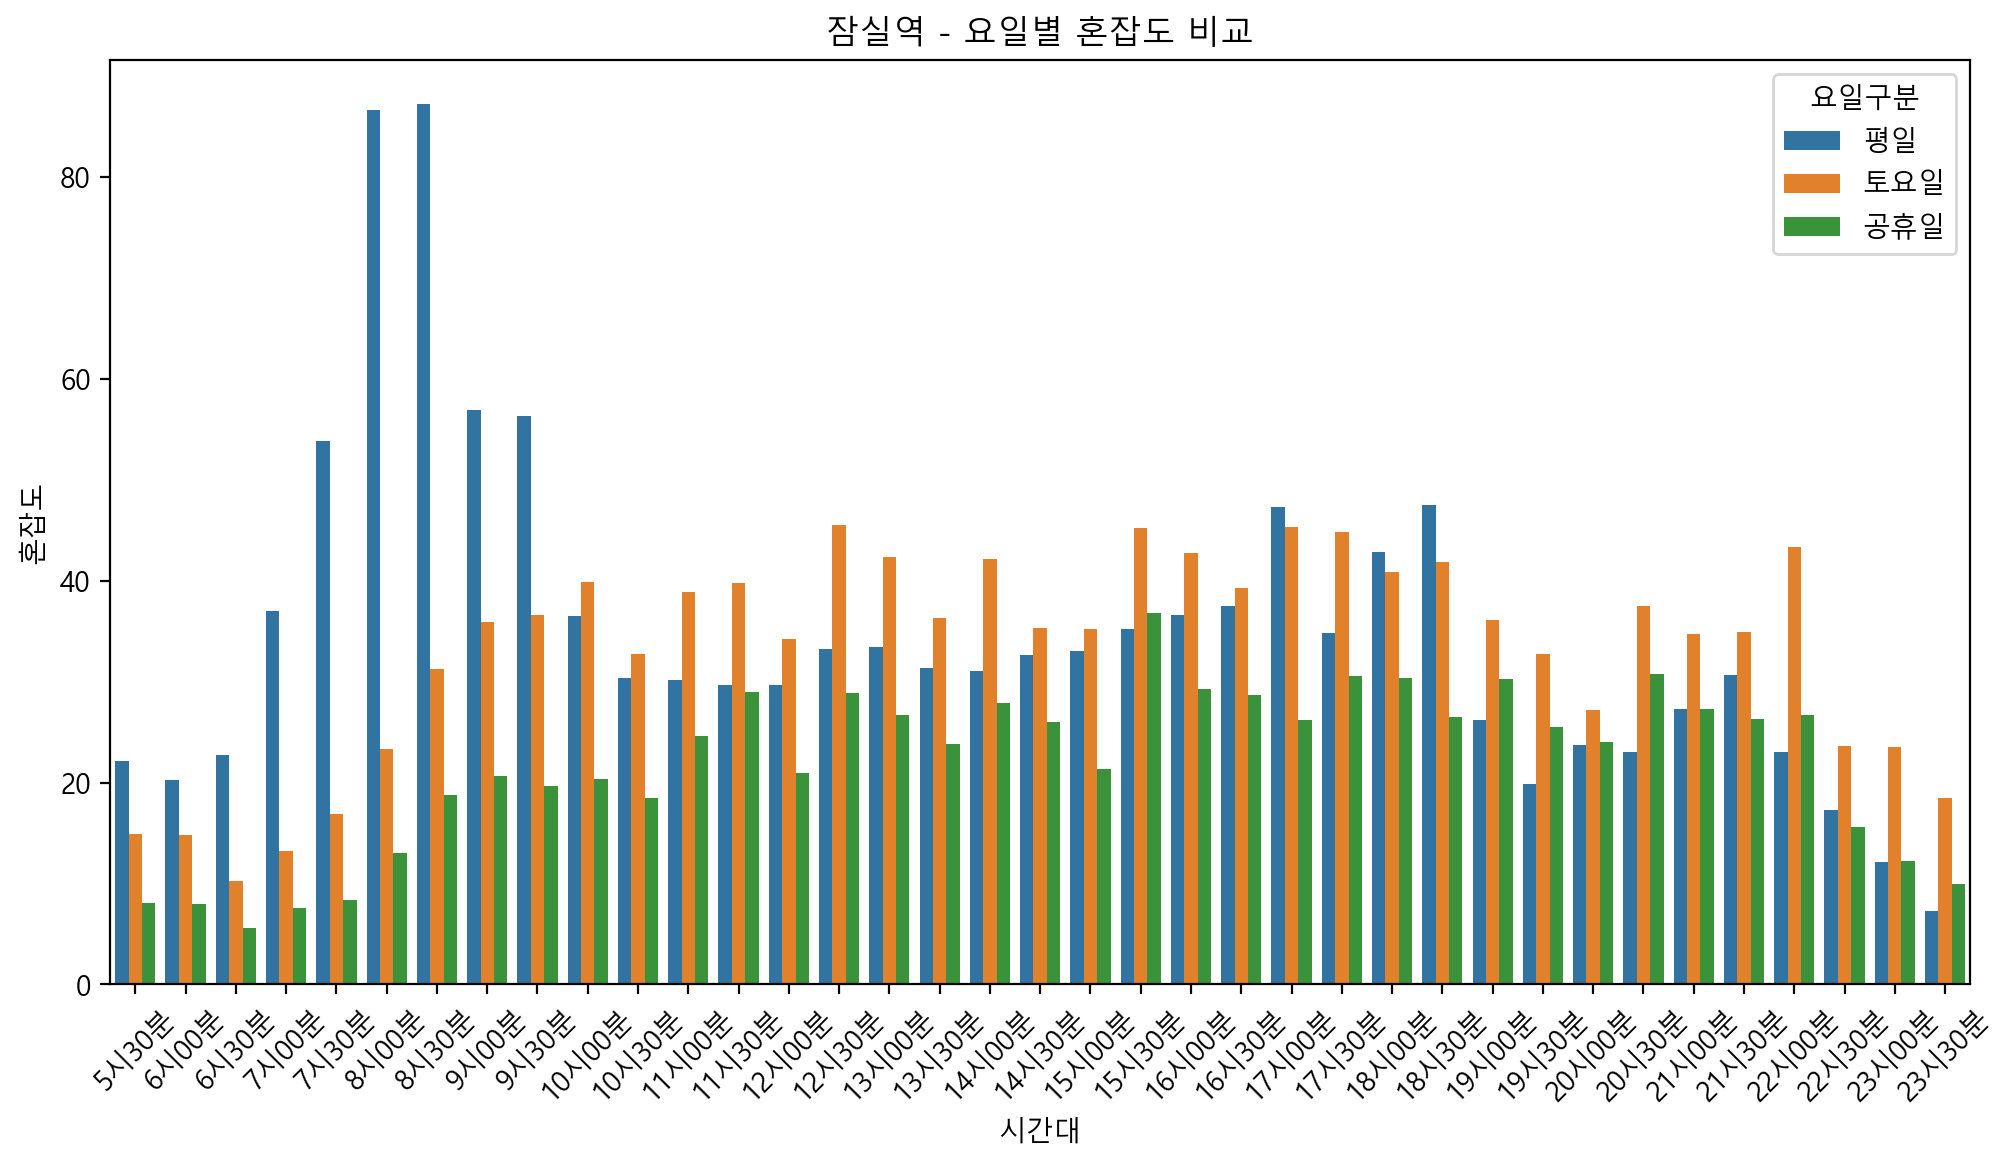

In [111]:
import matplotlib.pyplot as plt

# 데이터프레임을 'melt' 함수를 사용하여 'variable' 열로 변환
melted_df = df_js.melt(id_vars="요일구분", var_name="시간대", value_name="혼잡도")

# seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 조절
sns.barplot(data=melted_df, x="시간대", y="혼잡도", hue="요일구분")
plt.title('잠실역 - 요일별 혼잡도 비교')
plt.ylabel('혼잡도')
plt.xlabel('시간대')
plt.xticks(rotation=45)  # X 축 레이블 회전전

plt.show()
